In [42]:
import tensorflow as tf
from tensorflow.keras import datasets

In [2]:
# MNIST (손글씨)
data = datasets.mnist
(train_x, train_y), (test_x, test_y) = data.load_data()

In [41]:
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
type(train_x)

numpy.ndarray

In [4]:
train_x.shape

(60000, 28, 28)

In [5]:
train_x[0].shape

(28, 28)

In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

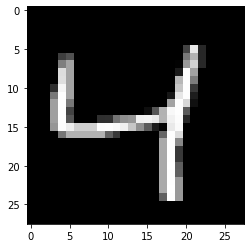

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_x[2], 'gray')
plt.show()

In [8]:
train_y[0]

5

In [9]:
# 검증데이터 분리
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, random_state=10)

In [10]:
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((45000, 28, 28), (15000, 28, 28), (45000,), (15000,))

In [11]:
train_y[:10]

array([8, 7, 9, 8, 0, 5, 8, 6, 2, 1], dtype=uint8)

In [12]:
28*28

784

In [13]:
# 모델에 입력하기 위해 차원 변경
# 스케일 조정(MinMax) 색상범위값 255로 나눔
train_x = train_x.reshape(train_x.shape[0],28*28)/255
valid_x = valid_x.reshape(valid_x.shape[0],28*28)/255
test_x = test_x.reshape(test_x.shape[0],28*28)/255

In [1]:
train_x.shape, valid_x.shape, test_x.shape

NameError: name 'train_x' is not defined

In [15]:
train_y[:10]

array([8, 7, 9, 8, 0, 5, 8, 6, 2, 1], dtype=uint8)

In [16]:
# label(정답)의 categorical값 -> 원핫인코딩
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
valid_y = to_categorical(valid_y)
test_y = to_categorical(test_y)

In [17]:
train_y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

### 신경망(ANN) 구현

In [18]:
# import
from tensorflow.keras.models import Sequential # 모델객체생성을 위한 클래스
from tensorflow.keras.layers import Dense # 레이어추가를 위한 클래스

In [19]:
# 랜덤시드값
tf.random.set_seed(14)

# 모델 구현
model = Sequential() # 객체 생성

# 데이터 입력받는 레이어
# Dense(출력데이터차원, 활성화함수, 입력데이터차원)
model.add(Dense(64, activation='relu', input_shape=(28*28,)))

# 레이어 추가
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

# 출력레이어
# label 값의 종류만큼 차원 지정
# 활성화함수 -> softmax
model.add(Dense(10, activation='softmax'))

# 모델 설정
# compile()
# 최적화기법 : adam(learning_rate=0.001)
# 손실함수 : categorical_crossentropy
# 평가지표 : accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 학습
# epochs : 학습횟수
# validation_data : 검증데이터
model.fit(train_x, train_y, epochs=10, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/10
900/900 [==============================] - 4s 4ms/step - loss: 0.7399 - accuracy: 0.7675 - val_loss: 0.2300 - val_accuracy: 0.9318
Epoch 2/10
900/900 [==============================] - 1s 960us/step - loss: 0.1811 - accuracy: 0.9469 - val_loss: 0.1577 - val_accuracy: 0.9534
Epoch 3/10
900/900 [==============================] - 1s 956us/step - loss: 0.1202 - accuracy: 0.9624 - val_loss: 0.1389 - val_accuracy: 0.9583
Epoch 4/10
900/900 [==============================] - 1s 995us/step - loss: 0.0991 - accuracy: 0.9705 - val_loss: 0.1259 - val_accuracy: 0.9629
Epoch 5/10
900/900 [==============================] - 1s 976us/step - loss: 0.0816 - accuracy: 0.9742 - val_loss: 0.1298 - val_accuracy: 0.9627
Epoch 6/10
900/900 [==============================] - 1s 945us/step - loss: 0.0677 - accuracy: 0.9789 - val_loss: 0.1266 - val_accuracy: 0.9650
Epoch 7/10
900/900 [==============================] - 1s 998us/step - loss: 0.0567 - accuracy: 0.9828 - val_loss: 0.1200 - val_accuracy: 0

In [20]:
# 테스트데이터 평가
# 손실값, 정확도
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 790us/step - loss: 0.1326 - accuracy: 0.9660


[0.1325613260269165, 0.9660000205039978]

In [21]:
 for func in ['sigmoid','tanh','relu']:
    # 랜덤시드값
    tf.random.set_seed(14)

    # 모델 구현
    model = Sequential() # 객체 생성

    # 데이터 입력받는 레이어
    # Dense(출력데이터차원, 활성화함수, 입력데이터차원)
    model.add(Dense(64, activation=func, input_shape=(28*28,)))

    # 레이어 추가
    model.add(Dense(32, activation=func))
    model.add(Dense(32, activation=func))
    model.add(Dense(32, activation=func))

    # 출력레이어
    # label 값의 종류만큼 차원 지정
    # 활성화함수 -> softmax
    model.add(Dense(10, activation='softmax'))

    # 모델 설정
    # compile()
    # 최적화기법 : adam(learning_rate=0.001)
    # 손실함수 : categorical_crossentropy
    # 평가지표 : accuracy
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 학습
    # epochs : 학습횟수
    # validation_data : 검증데이터
    model.fit(train_x, train_y, epochs=10, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/10
900/900 [==============================] - 1s 1ms/step - loss: 1.8944 - accuracy: 0.3853 - val_loss: 0.6804 - val_accuracy: 0.8628
Epoch 2/10
900/900 [==============================] - 1s 943us/step - loss: 0.5534 - accuracy: 0.8858 - val_loss: 0.3447 - val_accuracy: 0.9198
Epoch 3/10
900/900 [==============================] - 1s 960us/step - loss: 0.3095 - accuracy: 0.9282 - val_loss: 0.2683 - val_accuracy: 0.9327
Epoch 4/10
900/900 [==============================] - 1s 957us/step - loss: 0.2349 - accuracy: 0.9449 - val_loss: 0.2255 - val_accuracy: 0.9415
Epoch 5/10
900/900 [==============================] - 1s 981us/step - loss: 0.1978 - accuracy: 0.9518 - val_loss: 0.2044 - val_accuracy: 0.9454
Epoch 6/10
900/900 [==============================] - 1s 931us/step - loss: 0.1620 - accuracy: 0.9592 - val_loss: 0.1849 - val_accuracy: 0.9507
Epoch 7/10
900/900 [==============================] - 1s 949us/step - loss: 0.1344 - accuracy: 0.9655 - val_loss: 0.1753 - val_accuracy: 0

### softmax 함수

In [22]:
# softmax 함수
tf.nn.softmax([0.1,0.2,0.5])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.27800977, 0.30724832, 0.41474187], dtype=float32)>

In [23]:
tf.nn.softmax([0.1,0.2,0.5]).numpy()

array([0.27800977, 0.30724832, 0.41474187], dtype=float32)

In [24]:
tf.nn.softmax([0.1,0.2,0.5]).numpy().sum()

1.0

### 모델 설정(compile)

In [25]:
# import (optimizer 클래스)
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

for opt in [Adam(), SGD(), RMSprop()]:
    # 랜덤시드값
    tf.random.set_seed(14)

    # 모델 구현
    model = Sequential() # 객체 생성

    # 데이터 입력받는 레이어
    # Dense(출력데이터차원, 활성화함수, 입력데이터차원)
    model.add(Dense(64, activation='relu', input_shape=(28*28,)))

    # 레이어 추가
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))

    # 출력레이어
    # label 값의 종류만큼 차원 지정
    # 활성화함수 -> softmax
    model.add(Dense(10, activation='softmax'))

    # 모델 설정
    # compile()
    # 최적화기법 : adam(learning_rate=0.001)
    # 손실함수 : categorical_crossentropy
    # 평가지표 : accuracy
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # 학습
    # epochs : 학습횟수
    # validation_data : 검증데이터
    model.fit(train_x, train_y, epochs=10, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/10
900/900 [==============================] - 2s 1ms/step - loss: 0.7399 - accuracy: 0.7675 - val_loss: 0.2300 - val_accuracy: 0.9318
Epoch 2/10
900/900 [==============================] - 1s 972us/step - loss: 0.1811 - accuracy: 0.9469 - val_loss: 0.1577 - val_accuracy: 0.9534
Epoch 3/10
900/900 [==============================] - 1s 967us/step - loss: 0.1202 - accuracy: 0.9624 - val_loss: 0.1389 - val_accuracy: 0.9583
Epoch 4/10
900/900 [==============================] - 1s 992us/step - loss: 0.0991 - accuracy: 0.9705 - val_loss: 0.1259 - val_accuracy: 0.9629
Epoch 5/10
900/900 [==============================] - 1s 1ms/step - loss: 0.0816 - accuracy: 0.9742 - val_loss: 0.1298 - val_accuracy: 0.9627
Epoch 6/10
900/900 [==============================] - 1s 1ms/step - loss: 0.0677 - accuracy: 0.9789 - val_loss: 0.1266 - val_accuracy: 0.9650
Epoch 7/10
900/900 [==============================] - 1s 971us/step - loss: 0.0567 - accuracy: 0.9828 - val_loss: 0.1200 - val_accuracy: 0.965

### 성능평가

In [26]:
# 랜덤시드값
tf.random.set_seed(14)

# 모델 구현
model = Sequential() # 객체 생성

# 데이터 입력받는 레이어
# Dense(출력데이터차원, 활성화함수, 입력데이터차원)
model.add(Dense(64, activation='relu', input_shape=(28*28,)))

# 레이어 추가
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

# 출력레이어
# label 값의 종류만큼 차원 지정
# 활성화함수 -> softmax
model.add(Dense(10, activation='softmax'))

# 모델 설정
# compile()
# 최적화기법 : adam(learning_rate=0.001)
# 손실함수 : categorical_crossentropy
# 평가지표 : accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 학습
# epochs : 학습횟수
# validation_data : 검증데이터
history = model.fit(train_x, train_y, epochs=50, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/50
900/900 [==============================] - 2s 1ms/step - loss: 0.7399 - accuracy: 0.7675 - val_loss: 0.2300 - val_accuracy: 0.9318
Epoch 2/50
900/900 [==============================] - 1s 973us/step - loss: 0.1811 - accuracy: 0.9469 - val_loss: 0.1577 - val_accuracy: 0.9534
Epoch 3/50
900/900 [==============================] - 1s 975us/step - loss: 0.1202 - accuracy: 0.9624 - val_loss: 0.1389 - val_accuracy: 0.9583
Epoch 4/50
900/900 [==============================] - 1s 989us/step - loss: 0.0991 - accuracy: 0.9705 - val_loss: 0.1259 - val_accuracy: 0.9629
Epoch 5/50
900/900 [==============================] - 1s 976us/step - loss: 0.0816 - accuracy: 0.9742 - val_loss: 0.1298 - val_accuracy: 0.9627
Epoch 6/50
900/900 [==============================] - 1s 964us/step - loss: 0.0677 - accuracy: 0.9789 - val_loss: 0.1266 - val_accuracy: 0.9650
Epoch 7/50
900/900 [==============================] - 1s 971us/step - loss: 0.0567 - accuracy: 0.9828 - val_loss: 0.1200 - val_accuracy: 0

In [27]:
history.history

{'loss': [0.415483295917511,
  0.1723768413066864,
  0.12320245057344437,
  0.09952303767204285,
  0.08156460523605347,
  0.07012326270341873,
  0.061651721596717834,
  0.05189445987343788,
  0.04700708016753197,
  0.03993473947048187,
  0.03554048761725426,
  0.034410301595926285,
  0.03152928873896599,
  0.030571766197681427,
  0.02277863770723343,
  0.02759694866836071,
  0.026451369747519493,
  0.019688406959176064,
  0.021337926387786865,
  0.019747022539377213,
  0.019017476588487625,
  0.01821376383304596,
  0.01654270850121975,
  0.01808464713394642,
  0.016494043171405792,
  0.013868553563952446,
  0.013958444818854332,
  0.015056252479553223,
  0.014768964610993862,
  0.010741262696683407,
  0.015690967440605164,
  0.013416273519396782,
  0.012580003589391708,
  0.012742801569402218,
  0.012377594597637653,
  0.011677091009914875,
  0.008536017499864101,
  0.013800066895782948,
  0.009743292815983295,
  0.011349782347679138,
  0.011184933595359325,
  0.010506885126233101,
  0

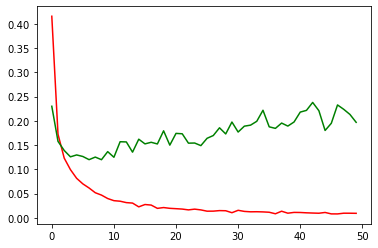

In [28]:
# 학습데이터 로스
plt.plot(history.history['loss'], c='r')
# 검증데이터 로스
plt.plot(history.history['val_loss'], c='g')
plt.show()

In [29]:
# 50회 학습한 모델(정확도 99%)로 테스트데이터 예측
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 783us/step - loss: 0.1687 - accuracy: 0.9725


[0.16865012049674988, 0.9725000262260437]

### 혼동행렬

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

pred = model.predict(test_x)
# 실제:[1,0,1], 예측:[1,0,0]
confusion_matrix(np.argmax(test_y, axis=1), np.argmax(pred, axis=1))

array([[ 962,    1,    3,    1,    1,    1,    2,    4,    4,    1],
       [   0, 1125,    2,    2,    0,    0,    1,    1,    4,    0],
       [   4,    3, 1001,    4,    1,    0,    2,    9,    8,    0],
       [   1,    0,    6,  980,    0,    5,    0,    6,    9,    3],
       [   0,    0,    2,    1,  959,    0,    5,    0,    0,   15],
       [   4,    0,    0,   12,    2,  857,    5,    1,   11,    0],
       [   3,    5,    2,    1,    5,    8,  931,    1,    2,    0],
       [   1,    3,    9,    2,    1,    0,    0,  997,   10,    5],
       [   7,    0,    1,    4,    2,    2,    2,    4,  949,    3],
       [   2,    2,    0,    5,   14,    5,    0,    5,   12,  964]],
      dtype=int64)

### 분류보고서

In [31]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(test_y, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.94      0.97      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [32]:
np.expand_dims(test_x[0],0)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [33]:
test_y[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [34]:
# 확률값을 출력
model.predict(np.expand_dims(test_x[0],0))

array([[1.1477916e-16, 8.3407722e-13, 1.3344019e-14, 1.8439465e-11,
        1.5597593e-13, 4.1426674e-17, 1.7765995e-19, 1.0000000e+00,
        1.4629619e-14, 1.4410050e-12]], dtype=float32)

In [35]:
# label값으로 출력
model.predict_classes(np.expand_dims(test_x[0],0))

C:\anconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7], dtype=int64)

In [36]:
!pip install opencv-python

In [37]:
import cv2

In [39]:
img = cv2.imread('2.jpg', cv2.IMREAD_GRAYSCALE)
# 이미지 리사이징
img = cv2.resize(img, None, fx=28/img.shape[1], fy=28/img.shape[0])
img = img/255

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
img.shape

In [ ]:
plt.imshow(img,'gray')
plt.show()

In [ ]:
img = img.reshape(-1)

In [ ]:
img.shape

In [ ]:
model.predict(np.expand_dims(img,0))

In [ ]:
model.predict_classes(np.expand_dims(img,0))

In [ ]:
test_y[1]

In [ ]:
model.predict_classes(np.expand_dims(test_x[1],0))